# WeatherPy
----

#### Note
* Instructions have been included for each segment. You do not have to follow them exactly, but they are included to help you think through the steps.

In [1]:
# Dependencies and Setup
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import requests
import time
from scipy.stats import linregress

# Import API key
from api_keys import weather_api_key

# Incorporated citipy to determine city based on latitude and longitude
from citipy import citipy

# Output File (CSV)
output_data_file = "output_data/cities.csv"

# Range of latitudes and longitudes
lat_range = (-90, 90)
lng_range = (-180, 180)

## Generate Cities List

In [2]:
# List for holding lat_lngs and cities
lat_lngs = []
cities = []

# Create a set of random lat and lng combinations
lats = np.random.uniform(lat_range[0], lat_range[1], size=1500)
lngs = np.random.uniform(lng_range[0], lng_range[1], size=1500)
lat_lngs = zip(lats, lngs)

# Identify nearest city for each lat, lng combination
for lat_lng in lat_lngs:
    city = citipy.nearest_city(lat_lng[0], lat_lng[1]).city_name
    
    # If the city is unique, then add it to a our cities list
    if city not in cities:
        cities.append(city)

# Print the city count to confirm sufficient count
len(cities)

592

### Perform API Calls
* Perform a weather check on each city using a series of successive API calls.
* Include a print log of each city as it'sbeing processed (with the city number and city name).


In [4]:
#Setup a flexibe url variable to iterate through cities from openweather.com
# and set units to Fahrenheit
index = 0
set_num = 1
url = f'http://api.openweathermap.org/data/2.5/weather?units=Imperial&appid={weather_api_key}'

city_info = []

for city in cities:
    city_name = city
    index += 1
    if index % 100 == 0:
        set_num += 1
    #make the url for each specific city in the list of cities
    city_url = url + "&q=" + city
    #make the print log
    print(f'Processing Record {index} of Set {set_num} | {city}')
    
    
    #Run the API request for info on each city in the list cities
    try:
        weather = requests.get(city_url).json()
        
        #extract the data on weather/latitude for each city
        city_temp = weather['main']['temp_max']
        #print(city_temp)
        city_lat = weather['coord']['lat']
        #print(city_lat)
        city_humid = weather['main']['humidity']
        #print(city_humid)
        city_cloud = weather['clouds']['all']
        #print(city_cloud)
        city_wind_spd = weather['wind']['speed']
        #print(city_wind_spd)
        longitude = weather['coord']['lon']
        city_country = weather['sys']['country']
        
        #extract the city information into the city_info list
        #which will become a list of dictionaries we can convert to
        #a pandas dataframe
        city_info.append({
            
            "City": city_name,
            "Max Temperature" : city_temp,
            "Latitude" : city_lat,
            "Longitude" : longitude,
            "Humidity" : city_humid,
            "Cloud %" : city_cloud,
            "Wind Speed" : city_wind_spd,
            "Country" : city_country
            
        })
    except:
        print('not on openweather')
        
print('--------------')
print('City Data Loading Finished')
#print(city_info)    

Processing Record 1 of Set 1 | poum
Processing Record 2 of Set 1 | alofi
Processing Record 3 of Set 1 | kapaa
Processing Record 4 of Set 1 | hilo
Processing Record 5 of Set 1 | ushuaia
Processing Record 6 of Set 1 | amderma
not on openweather
Processing Record 7 of Set 1 | castro
Processing Record 8 of Set 1 | ossora
Processing Record 9 of Set 1 | lebu
Processing Record 10 of Set 1 | punta arenas
Processing Record 11 of Set 1 | sao joao da barra
Processing Record 12 of Set 1 | chuy
Processing Record 13 of Set 1 | bredasdorp
Processing Record 14 of Set 1 | vallenar
Processing Record 15 of Set 1 | cabo san lucas
Processing Record 16 of Set 1 | chokurdakh
Processing Record 17 of Set 1 | puerto ayora
Processing Record 18 of Set 1 | sao francisco de paula
Processing Record 19 of Set 1 | nishihara
Processing Record 20 of Set 1 | bukama
Processing Record 21 of Set 1 | arraial do cabo
Processing Record 22 of Set 1 | busselton
Processing Record 23 of Set 1 | waitati
Processing Record 24 of Set 

Processing Record 187 of Set 2 | severo-kurilsk
Processing Record 188 of Set 2 | havoysund
Processing Record 189 of Set 2 | palmer
Processing Record 190 of Set 2 | olbia
Processing Record 191 of Set 2 | pidhorodne
Processing Record 192 of Set 2 | saldanha
Processing Record 193 of Set 2 | odweyne
Processing Record 194 of Set 2 | kruisfontein
Processing Record 195 of Set 2 | sorong
Processing Record 196 of Set 2 | egvekinot
Processing Record 197 of Set 2 | norman wells
Processing Record 198 of Set 2 | sabzevar
Processing Record 199 of Set 2 | tautira
Processing Record 200 of Set 3 | yulara
Processing Record 201 of Set 3 | batsfjord
Processing Record 202 of Set 3 | mosjoen
Processing Record 203 of Set 3 | benghazi
Processing Record 204 of Set 3 | bengkulu
Processing Record 205 of Set 3 | klaksvik
Processing Record 206 of Set 3 | springfield
Processing Record 207 of Set 3 | barrow
Processing Record 208 of Set 3 | adrar
Processing Record 209 of Set 3 | saint-pierre
Processing Record 210 of 

Processing Record 375 of Set 4 | thompson
Processing Record 376 of Set 4 | manokwari
Processing Record 377 of Set 4 | waipawa
Processing Record 378 of Set 4 | tsevie
Processing Record 379 of Set 4 | jalu
Processing Record 380 of Set 4 | tuktoyaktuk
Processing Record 381 of Set 4 | sosnovo-ozerskoye
Processing Record 382 of Set 4 | kirkland lake
Processing Record 383 of Set 4 | mullaitivu
not on openweather
Processing Record 384 of Set 4 | acapulco
Processing Record 385 of Set 4 | bundaberg
Processing Record 386 of Set 4 | pisco
Processing Record 387 of Set 4 | padang
Processing Record 388 of Set 4 | valparaiso
Processing Record 389 of Set 4 | methoni
Processing Record 390 of Set 4 | petropavlovskoye
Processing Record 391 of Set 4 | yinchuan
Processing Record 392 of Set 4 | rawlins
Processing Record 393 of Set 4 | kalmunai
Processing Record 394 of Set 4 | lubango
Processing Record 395 of Set 4 | khandyga
Processing Record 396 of Set 4 | chulman
Processing Record 397 of Set 4 | laguna
Pr

Processing Record 561 of Set 6 | chachapoyas
Processing Record 562 of Set 6 | tilichiki
Processing Record 563 of Set 6 | hervey bay
Processing Record 564 of Set 6 | abbeville
Processing Record 565 of Set 6 | bolungarvik
not on openweather
Processing Record 566 of Set 6 | inirida
Processing Record 567 of Set 6 | inhambane
Processing Record 568 of Set 6 | lexington
Processing Record 569 of Set 6 | abu road
Processing Record 570 of Set 6 | ust-kuyga
Processing Record 571 of Set 6 | ulladulla
Processing Record 572 of Set 6 | marondera
Processing Record 573 of Set 6 | itoman
Processing Record 574 of Set 6 | felidhoo
not on openweather
Processing Record 575 of Set 6 | xanxere
Processing Record 576 of Set 6 | upington
Processing Record 577 of Set 6 | keita
Processing Record 578 of Set 6 | bojnurd
Processing Record 579 of Set 6 | lithakia
Processing Record 580 of Set 6 | mocuba
Processing Record 581 of Set 6 | loreto
Processing Record 582 of Set 6 | cabedelo
Processing Record 583 of Set 6 | ut

### Convert Raw Data to DataFrame
* Export the city data into a .csv.
* Display the DataFrame

In [5]:
city_data = pd.DataFrame(city_info)
city_data.head()

city_data.to_csv(output_data_file, index = False)

## Inspect the data and remove the cities where the humidity > 100%.
----
Skip this step if there are no cities that have humidity > 100%. 

In [6]:
#  Get the indices of cities that have humidity over 100%.
humidity_values = city_data['Humidity'].unique()
print(max(humidity_values))

100


In [7]:
#There are no cities with over 100% humidity

In [8]:
# Make a new DataFrame equal to the city data to drop all humidity outliers by index.
# Passing "inplace=False" will make a copy of the city_data DataFrame, which we call "clean_city_data".


## Plotting the Data
* Use proper labeling of the plots using plot titles (including date of analysis) and axes labels.
* Save the plotted figures as .pngs.

In [9]:
#make variables for the columns in the city-data dataframe
latitude = city_data['Latitude']
max_temp = city_data['Max Temperature']
city = city_data['City']
humidity = city_data['Humidity']
clouds = city_data['Cloud %']
wind_spd = city_data['Wind Speed']
dates = city_data['Longitude']

## Latitude vs. Temperature Plot

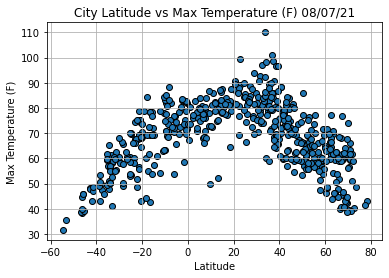

In [10]:
plt.scatter(latitude, max_temp, edgecolor = 'black')
plt.grid(True)
#time.stftime will allow the code to use the current date to the title whenever it is run
plt.title(f"City Latitude vs Max Temperature (F) {time.strftime('%x')}")
plt.xlabel("Latitude")
plt.ylabel("Max Temperature (F)")

#save the graph
plt.savefig("output_data/max_temp_scatter.png")

The highest maximum temperatures tend to be between the equator and a latitude of 40 degrees in this sample.


## Latitude vs. Humidity Plot

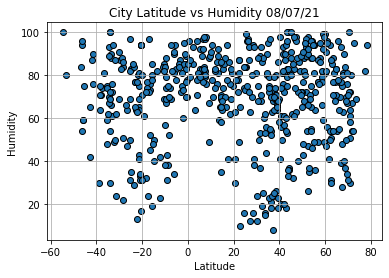

In [11]:
plt.scatter(latitude, humidity, edgecolor = 'black')
plt.grid(True)
#time.stftime will allow the code to use the current date to the title whenever it is run
plt.title(f"City Latitude vs Humidity {time.strftime('%x')}")
plt.xlabel("Latitude")
plt.ylabel("Humidity")

#save the graph
plt.savefig("output_data/humidity_scatter.png")

None of the least humid cities are on the equator, and the most humid cities in this sample begin to appear 20 degrees north and south of the equator.

## Latitude vs. Cloudiness Plot

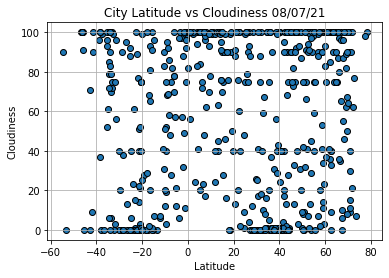

In [12]:
plt.scatter(latitude, clouds, edgecolor = 'black')
plt.grid(True)
#time.stftime will allow the code to use the current date to the title whenever it is run
plt.title(f"City Latitude vs Cloudiness {time.strftime('%x')}")
plt.xlabel("Latitude")
plt.ylabel("Cloudiness")

#save the graph
plt.savefig("output_data/cloud_scatter.png")

Most cities with the least cloudines have a latitude of -45 to -10 degrees and 20 to 50 degrees. Most of the cloudiest cities are north of the equator.

## Latitude vs. Wind Speed Plot

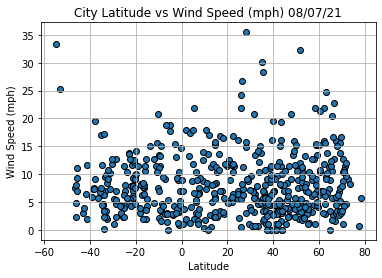

In [13]:
plt.scatter(latitude, wind_spd, edgecolor = 'black')
plt.grid(True)
#time.stftime will allow the code to use the current date to the title whenever it is run
plt.title(f"City Latitude vs Wind Speed (mph) {time.strftime('%x')}")
plt.xlabel("Latitude")
plt.ylabel("Wind Speed (mph)")

#save the graph
plt.savefig("output_data/wind_speed_scatter.png")

There does not seem to be a strong correlation between latitude and wind speed.

## Linear Regression

In [14]:
#make dataframes split into northern and southern hemispheres
northern_data_df = city_data.loc[(city_data['Latitude'] >= 0)]
southern_data_df = city_data.loc[(city_data['Latitude'] < 0)]

####  Northern Hemisphere - Max Temp vs. Latitude Linear Regression

The r-value is: -0.65


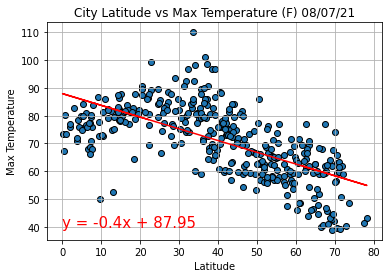

In [15]:
#setup the template to create plots with regression lines--will only need to 
#change labels and df columns
#I got this code mainly from the class matplotlib day three notebook
x_values = northern_data_df['Latitude']
y_values = northern_data_df['Max Temperature']
(slope, intercept, rvalue, pvalue, stderr) = linregress(x_values, y_values)
regress_values = x_values * slope + intercept
#this line equation will be printed on the graph
line_equation = 'y = ' + str(round(slope,1)) + 'x + ' + str(round(intercept,2))

#make the graph
plt.scatter(x_values, y_values, edgecolor = 'black')
plt.plot(x_values,regress_values, 'r-')
plt.annotate(line_equation,(0,40), fontsize = 15, color = 'red')
plt.grid(True)
#time.stftime will allow the code to use the current date to the title whenever it is run
plt.title(f"City Latitude vs Max Temperature (F) {time.strftime('%x')}")
plt.xlabel("Latitude")
plt.ylabel("Max Temperature")
print("The r-value is: " + str(round(rvalue,2)))
#save the graph
plt.savefig("output_data/north_maxtemp_regression_scatter.png")

The linear regression shows us that maximum temperatures are generally likely to fall the further one moves north of the equator. The r-value of -.65 tells us that there is a strong negative relationship between increased city latitude and maximum temperature.

####  Southern Hemisphere - Max Temp vs. Latitude Linear Regression

The r-value is: 0.78


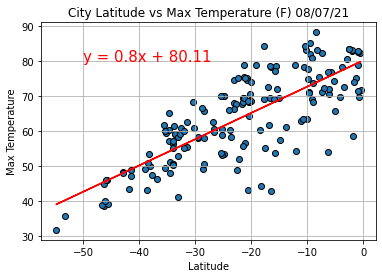

In [16]:
#make the same graph for southern latitudes
x_values = southern_data_df['Latitude']
y_values = southern_data_df['Max Temperature']
(slope, intercept, rvalue, pvalue, stderr) = linregress(x_values, y_values)
regress_values = x_values * slope + intercept
#this line equation will be printed on the graph
line_equation = 'y = ' + str(round(slope,1)) + 'x + ' + str(round(intercept,2))

#make the graph
plt.scatter(x_values, y_values, edgecolor = 'black')
plt.plot(x_values,regress_values, 'r-')
plt.annotate(line_equation,(-50,80), fontsize = 15, color = 'red')
plt.grid(True)
#time.stftime will allow the code to use the current date to the title whenever it is run
plt.title(f"City Latitude vs Max Temperature (F) {time.strftime('%x')}")
plt.xlabel("Latitude")
plt.ylabel("Max Temperature")
print("The r-value is: " + str(round(rvalue,2)))
#save the graph
plt.savefig("output_data/south_maxtemp_regression_scatter.png")

This linear regression is similar to the past graph in that it also shows that maximum temperatures drop the further one goes from the equator. In this data set there is a more uniform distribution around the regression line, though the cities examined are not as far away from the equator as in the Northern Hemisphere. Lastly, the r-value of .76 indicates a very strong positive relationship between maximum temperature and increase in latitude as one moves toward the equator from further away in the Southern Hemisphere.

####  Northern Hemisphere - Humidity (%) vs. Latitude Linear Regression

The r-value is: -0.1


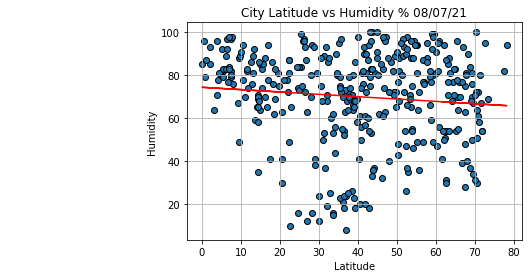

In [17]:
#make the same graph for southern latitudes
x_values = northern_data_df['Latitude']
y_values = northern_data_df['Humidity']
(slope, intercept, rvalue, pvalue, stderr) = linregress(x_values, y_values)
regress_values = x_values * slope + intercept
#this line equation will be printed on the graph
line_equation = 'y = ' + str(round(slope,1)) + 'x + ' + str(round(intercept,2))

#make the graph
plt.scatter(x_values, y_values, edgecolor = 'black')
plt.plot(x_values,regress_values, 'r-')
plt.annotate(line_equation,(-50,20), fontsize = 15, color = 'red')
plt.grid(True)
#time.stftime will allow the code to use the current date to the title whenever it is run
plt.title(f"City Latitude vs Humidity % {time.strftime('%x')}")
plt.xlabel("Latitude")
plt.ylabel("Humidity")
print("The r-value is: " + str(round(rvalue,2)))
#save the graph
plt.savefig("output_data/north_humidity_regression_scatter.png")

This graph coupled with the r-value shows that there is almost no correlation between latitude and humidity in the Northern Hemisphere.

####  Southern Hemisphere - Humidity (%) vs. Latitude Linear Regression

The r-value is: 0.01


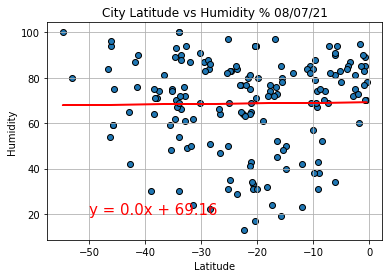

In [18]:
#make the same graph for southern latitudes
x_values = southern_data_df['Latitude']
y_values = southern_data_df['Humidity']
(slope, intercept, rvalue, pvalue, stderr) = linregress(x_values, y_values)
regress_values = x_values * slope + intercept
#this line equation will be printed on the graph
line_equation = 'y = ' + str(round(slope,1)) + 'x + ' + str(round(intercept,2))

#make the graph
plt.scatter(x_values, y_values, edgecolor = 'black')
plt.plot(x_values,regress_values, 'r-')
plt.annotate(line_equation,(-50,20), fontsize = 15, color = 'red')
plt.grid(True)
#time.stftime will allow the code to use the current date to the title whenever it is run
plt.title(f"City Latitude vs Humidity % {time.strftime('%x')}")
plt.xlabel("Latitude")
plt.ylabel("Humidity")
print("The r-value is: " + str(round(rvalue,2)))
#save the graph
plt.savefig("output_data/south_humidity_regression_scatter.png")

As in the Northern Hemisphere, there is almost no correlation between humidity and latitude in the Southern Hemisphere.

####  Northern Hemisphere - Cloudiness (%) vs. Latitude Linear Regression

The r-value is: -0.04


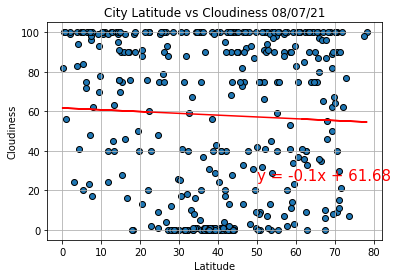

In [19]:
#make the same graph for southern latitudes
x_values = northern_data_df['Latitude']
y_values = northern_data_df['Cloud %']
(slope, intercept, rvalue, pvalue, stderr) = linregress(x_values, y_values)
regress_values = x_values * slope + intercept
#this line equation will be printed on the graph
line_equation = 'y = ' + str(round(slope,1)) + 'x + ' + str(round(intercept,2))

#make the graph
plt.scatter(x_values, y_values, edgecolor = 'black')
plt.plot(x_values,regress_values, 'r-')
plt.annotate(line_equation,(50,25), fontsize = 15, color = 'red')
plt.grid(True)
#time.stftime will allow the code to use the current date to the title whenever it is run
plt.title(f"City Latitude vs Cloudiness {time.strftime('%x')}")
plt.xlabel("Latitude")
plt.ylabel("Cloudiness")
print("The r-value is: " + str(round(rvalue,2)))
#save the graph
plt.savefig("output_data/north_cloudiness_regression_scatter.png")

Though the line of linear regression and r-value suggest there is not a correllation between latitude and cloudiness in the Northern Hemisphere, the distribution of the data suggest otherwise. I say that about this graph mainly because the vast majority of cities with 0% cloudiness are between 25 and 45 degrees latitude.

####  Southern Hemisphere - Cloudiness (%) vs. Latitude Linear Regression

The r-value is: -0.0


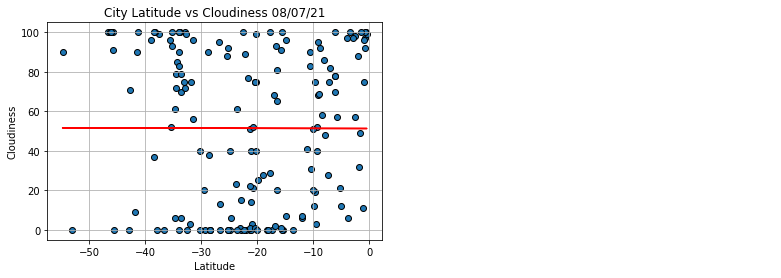

In [20]:
#make the same graph for southern latitudes
x_values = southern_data_df['Latitude']
y_values = southern_data_df['Cloud %']
(slope, intercept, rvalue, pvalue, stderr) = linregress(x_values, y_values)
regress_values = x_values * slope + intercept
#this line equation will be printed on the graph
line_equation = 'y = ' + str(round(slope,1)) + 'x + ' + str(round(intercept,2))

#make the graph
plt.scatter(x_values, y_values, edgecolor = 'black')
plt.plot(x_values,regress_values, 'r-')
plt.annotate(line_equation,(50,25), fontsize = 15, color = 'red')
plt.grid(True)
#time.stftime will allow the code to use the current date to the title whenever it is run
plt.title(f"City Latitude vs Cloudiness {time.strftime('%x')}")
plt.xlabel("Latitude")
plt.ylabel("Cloudiness")
print("The r-value is: " + str(round(rvalue,2)))
#save the graph
plt.savefig("output_data/south_cloudiness_regression_scatter.png")

The analysis of this graph is similar to the previous. Latitude does have a substantial impact on cloudiness in the sense that the least cloudy cities are clustered around particular latitudes. However this r-value would have one think there is no correlation at all.

####  Northern Hemisphere - Wind Speed (mph) vs. Latitude Linear Regression

The r-value is: 0.01


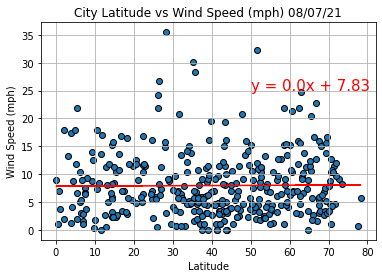

In [21]:
#make the same graph for southern latitudes
x_values = northern_data_df['Latitude']
y_values = northern_data_df['Wind Speed']
(slope, intercept, rvalue, pvalue, stderr) = linregress(x_values, y_values)
regress_values = x_values * slope + intercept
#this line equation will be printed on the graph
line_equation = 'y = ' + str(round(slope,1)) + 'x + ' + str(round(intercept,2))

#make the graph
plt.scatter(x_values, y_values, edgecolor = 'black')
plt.plot(x_values,regress_values, 'r-')
plt.annotate(line_equation,(50,25), fontsize = 15, color = 'red')
plt.grid(True)
#time.stftime will allow the code to use the current date to the title whenever it is run
plt.title(f"City Latitude vs Wind Speed (mph) {time.strftime('%x')}")
plt.xlabel("Latitude")
plt.ylabel("Wind Speed (mph)")
print("The r-value is: " + str(round(rvalue,2)))
#save the graph
plt.savefig("output_data/north_wind_speed_regression_scatter.png")

There is essentially no correlation between wind speed and latitude in the Northern Hemisphere.

####  Southern Hemisphere - Wind Speed (mph) vs. Latitude Linear Regression

The r-value is: -0.09


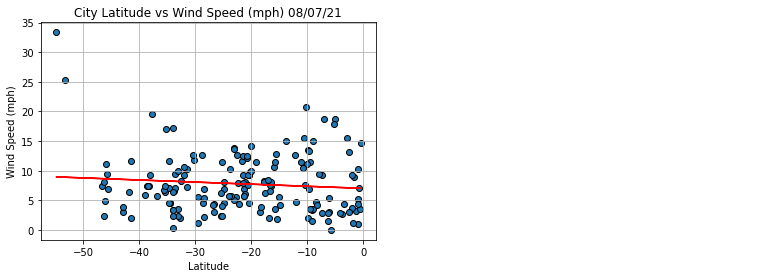

In [22]:
#make the same graph for southern latitudes
x_values = southern_data_df['Latitude']
y_values = southern_data_df['Wind Speed']
(slope, intercept, rvalue, pvalue, stderr) = linregress(x_values, y_values)
regress_values = x_values * slope + intercept
#this line equation will be printed on the graph
line_equation = 'y = ' + str(round(slope,1)) + 'x + ' + str(round(intercept,2))

#make the graph
plt.scatter(x_values, y_values, edgecolor = 'black')
plt.plot(x_values,regress_values, 'r-')
plt.annotate(line_equation,(50,25), fontsize = 15, color = 'red')
plt.grid(True)
#time.stftime will allow the code to use the current date to the title whenever it is run
plt.title(f"City Latitude vs Wind Speed (mph) {time.strftime('%x')}")
plt.xlabel("Latitude")
plt.ylabel("Wind Speed (mph)")
print("The r-value is: " + str(round(rvalue,2)))
#save the graph
plt.savefig("output_data/south_wind_speed_regression_scatter.png")

As in the Northern Hemisphere, there does not appear to be a strong correlation between latitude and wind speed in the Southern Hemisphere.